# This&nbsp;is&nbsp;an&nbsp;analysis&nbsp;from&nbsp;Sluppenveien&nbsp;19

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing,ensemble
from sklearn import metrics
from matplotlib.pyplot import figure

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('/datasets/sluppenvegen19/Sluppenvegen19.csv', delimiter=";", decimal=",")
data = pd.DataFrame(data)

In [3]:
#DateTime veranderen
time=pd.to_datetime(data['Time'],format='%d.%m.%Y %H:%M')
data = data.set_index(time)
data = data.drop('Time', axis=1)

data=pd.concat([data],axis=1)
data=data.sort_values('Time')

data.head(50)

kWh  kWh.1  m3  kWh.2  kWh.3
Time                                               
2019-09-01 00:00:00   88.0    4.0 NaN    NaN    NaN
2019-09-01 01:00:00   92.4    3.0 NaN    NaN    NaN
2019-09-01 02:00:00   88.8    4.0 NaN    NaN    NaN
2019-09-01 03:00:00   85.6    3.0 NaN    NaN    NaN
2019-09-01 04:00:00   89.2    3.0 NaN    NaN    NaN
2019-09-01 05:00:00   88.0    4.0 NaN    NaN    NaN
2019-09-01 06:00:00   83.2    3.0 NaN    NaN    NaN
2019-09-01 07:00:00   85.2    3.0 NaN    NaN    NaN
2019-09-01 08:00:00   84.8    4.0 NaN    NaN    NaN
2019-09-01 09:00:00   84.8    3.0 NaN    NaN    NaN
2019-09-01 10:00:00   84.0    3.0 NaN    NaN    NaN
2019-09-01 11:00:00   70.8    4.0 NaN    NaN    NaN
2019-09-01 12:00:00   38.4    3.0 NaN    NaN    NaN
2019-09-01 13:00:00   40.0    3.0 NaN    NaN    NaN
2019-09-01 14:00:00   38.4    4.0 NaN    NaN    NaN
2019-09-01 15:00:00   38.4    5.0 NaN    NaN    NaN
2019-09-01 16:00:00   65.2    3.0 NaN    NaN    NaN
2019-09-01 17:00:00   76.4    3.0 NaN    NaN    NaN
2019-09-01 18:00:00   76.0    4.0 NaN    NaN    NaN
2019-09-01 19:00:00   74.8    3.0 NaN    NaN    NaN
2019-09-01 20:00:00   86.4    4.0 NaN    NaN    NaN
2019-09-01 21:00:00   84.0    3.0 NaN    NaN    NaN
2019-09-01 22:00:00   88.0    3.0 NaN    NaN    NaN
2019-09-01 23:00:00   82.0    4.0 NaN    NaN    NaN
2019-09-02 00:00:00   82.8    3.0 NaN    NaN    NaN
2019-09-02 01:00:00   86.0    4.0 NaN    NaN    NaN
2019-09-02 02:00:00   83.6    3.0 NaN    NaN    NaN
2019-09-02 03:00:00   85.2    4.0 NaN    NaN    NaN
2019-09-02 04:00:00   82.0    3.0 NaN    NaN    NaN
2019-09-02 05:00:00   88.4    4.0 NaN    NaN    NaN
2019-09-02 06:00:00   95.2    8.0 NaN    NaN    NaN
2019-09-02 07:00:00  129.2   12.0 NaN    NaN    NaN
2019-09-02 08:00:00  144.8   16.0 NaN    NaN    NaN
2019-09-02 09:00:00  153.6   15.0 NaN    NaN    NaN
2019-09-02 10:00:00  143.6   11.0 NaN    NaN    NaN
2019-09-02 11:00:00  115.6    9.0 NaN    NaN    NaN
2019-09-02 12:00:00  112.4   16.0 NaN    NaN    NaN
2019-09-02 13:00:00  132.0   15.0 NaN    NaN    NaN
2019-09-02 14:00:00  102.8   32.0 NaN    NaN    NaN
2019-09-02 15:00:00   98.0    8.0 NaN    NaN    NaN
2019-09-02 16:00:00  104.0    5.0 NaN    NaN    NaN
2019-09-02 17:00:00   88.0    4.0 NaN    NaN    NaN
2019-09-02 18:00:00   91.6    4.0 NaN    NaN    NaN
2019-09-02 19:00:00   96.8    3.0 NaN    NaN    NaN
2019-09-02 20:00:00   95.2    3.0 NaN    NaN    NaN
2019-09-02 21:00:00   90.8    4.0 NaN    NaN    NaN
2019-09-02 22:00:00   94.0    3.0 NaN    NaN    NaN
2019-09-02 23:00:00   90.0    5.0 NaN    NaN    NaN
2019-09-03 00:00:00   94.0    3.0 NaN    NaN    NaN
2019-09-03 01:00:00   89.2    3.0 NaN    NaN    NaN

# Analysis Electricity consumption

Before we dive in any data, it's smart to plot the data received through the data file.

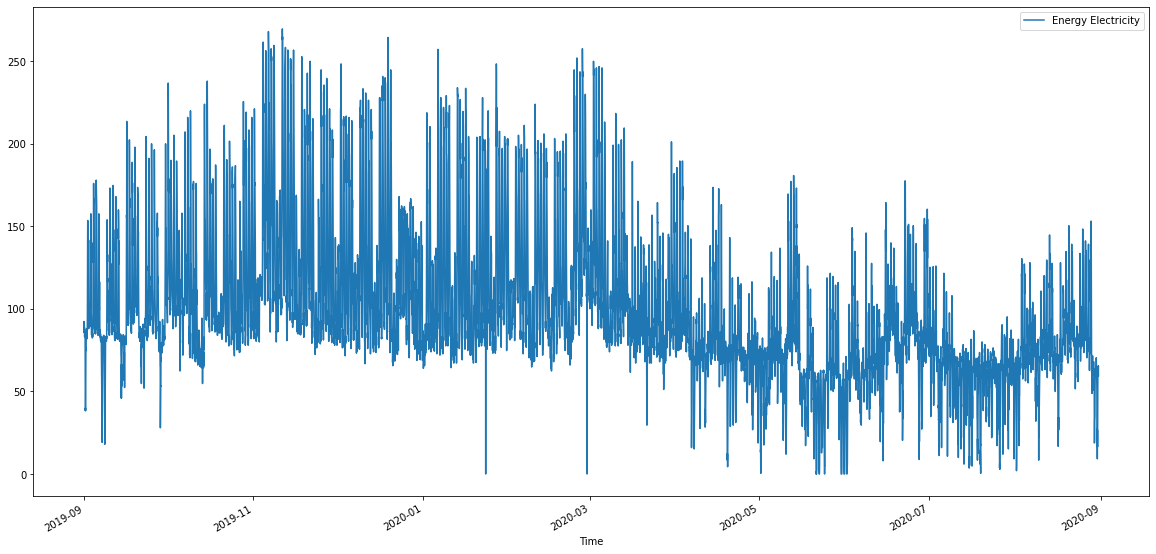

In [4]:
figure(figsize=(20,10))
data['kWh'].plot(label='Energy Electricity')
plt.legend()

Now it would be interesting to see the data but zoomed in through time.

[Text(0.5, 0, 'Time over a day'),
 Text(0.5, 1.0, 'Consumed energy (electricity) over a day (20219/10/01)')]

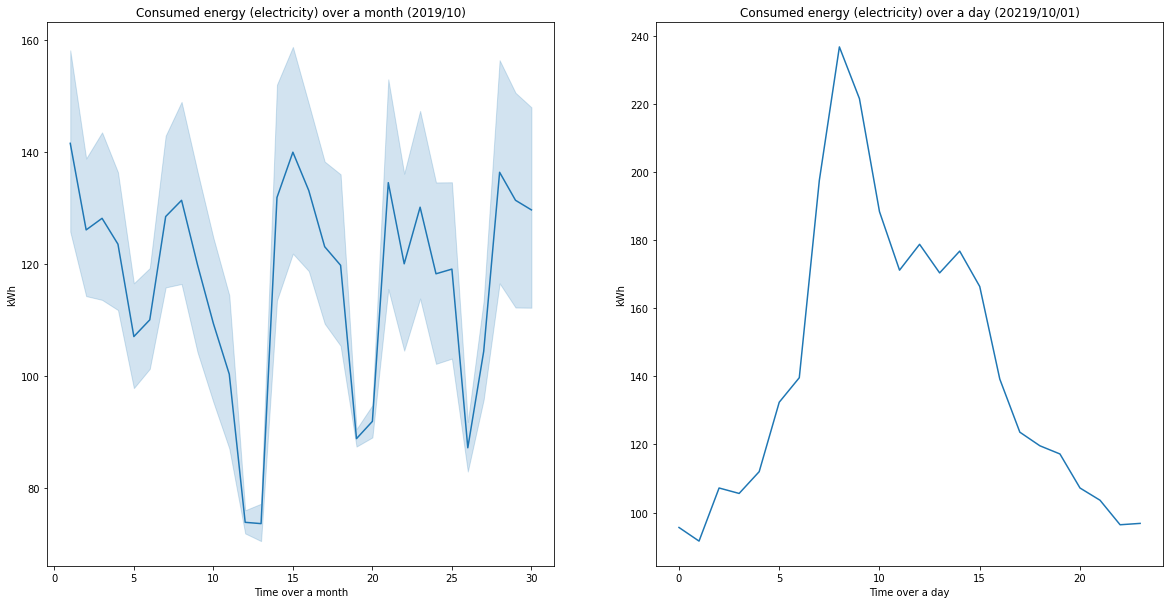

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

data_month = data.loc['2019-10-01':'2019-10-30']
data_day = data.loc['2019-10-01']

plot = sn.lineplot(x=data_month.index.day,y=data_month['kWh'], ax=axes[0])
plot.set(xlabel ="Time over a month", title = 'Consumed energy (electricity) over a month (2019/10)')
plot = sn.lineplot(x=data_day.index.hour,y=data_day['kWh'], ax=axes[1])
plot.set(xlabel ="Time over a day", title = 'Consumed energy (electricity) over a day (20219/10/01)')


Boxplots can give extra information about outliers, median and quartiles.

[Text(0.5, 0, ' '),
 Text(0.5, 1.0, 'Consumed energy (electricity) over a day (2019/10/01)')]

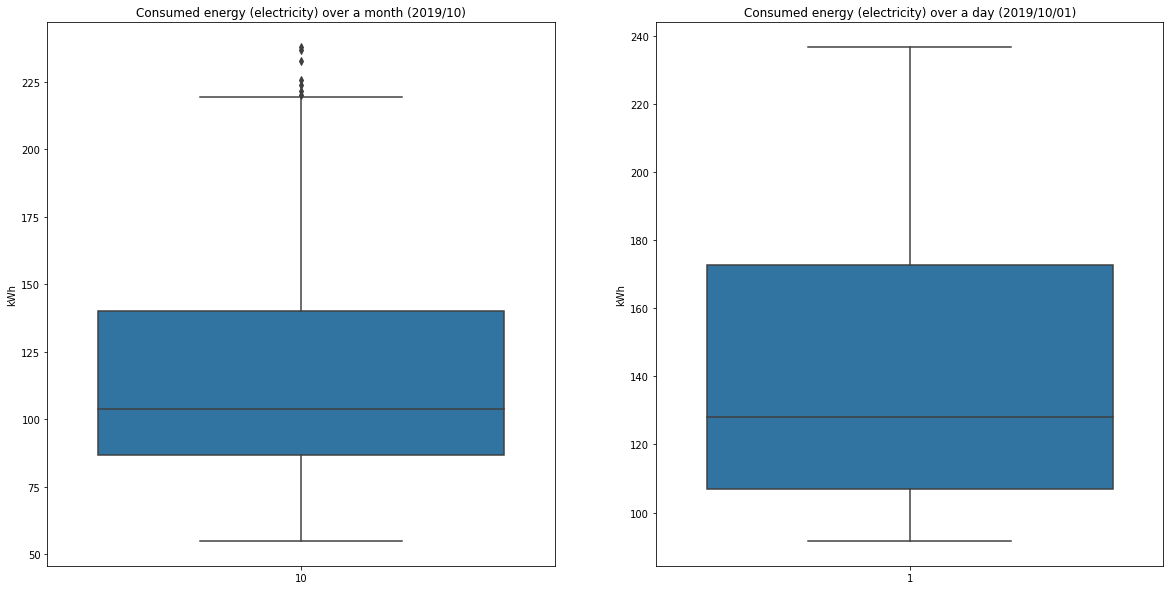

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

boxplot = sn.boxplot(x=data_month.index.month,y=data_month['kWh'], ax=axes[0])
boxplot.set(xlabel =" ", title = 'Consumed energy (electricity) over a month (2019/10)')

boxplot = sn.boxplot(x=data_day.index.day,y=data_day['kWh'], ax=axes[1])
boxplot.set(xlabel =" ", title = 'Consumed energy (electricity) over a day (2019/10/01)')

The duration curve shows us how much of te time (in percentage) a certain energy is used.

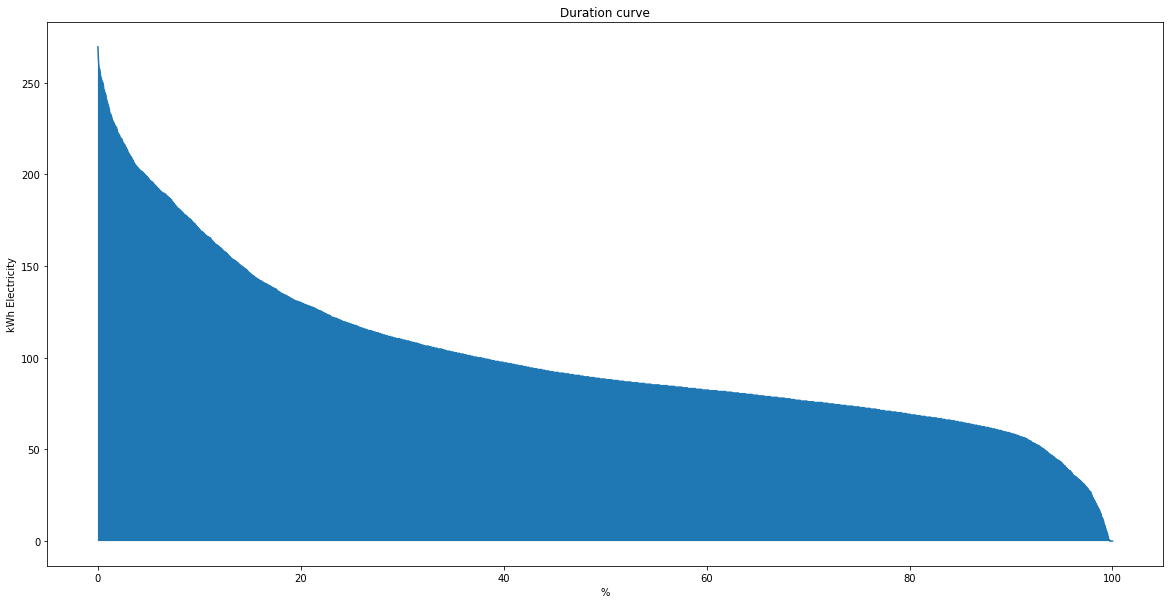

In [7]:
sort_data=np.sort(data['kWh'])[::-1]
exceedence = np.arange(1.,len(sort_data)+1) / len(sort_data)

figure(figsize=(20,10))
plt.plot(exceedence*100, sort_data)
plt.fill_between(exceedence*100, sort_data)
plt.xlabel("%")
plt.ylabel("kWh Electricity")
plt.title("Duration curve")
plt.show()

# Analysis District Heating

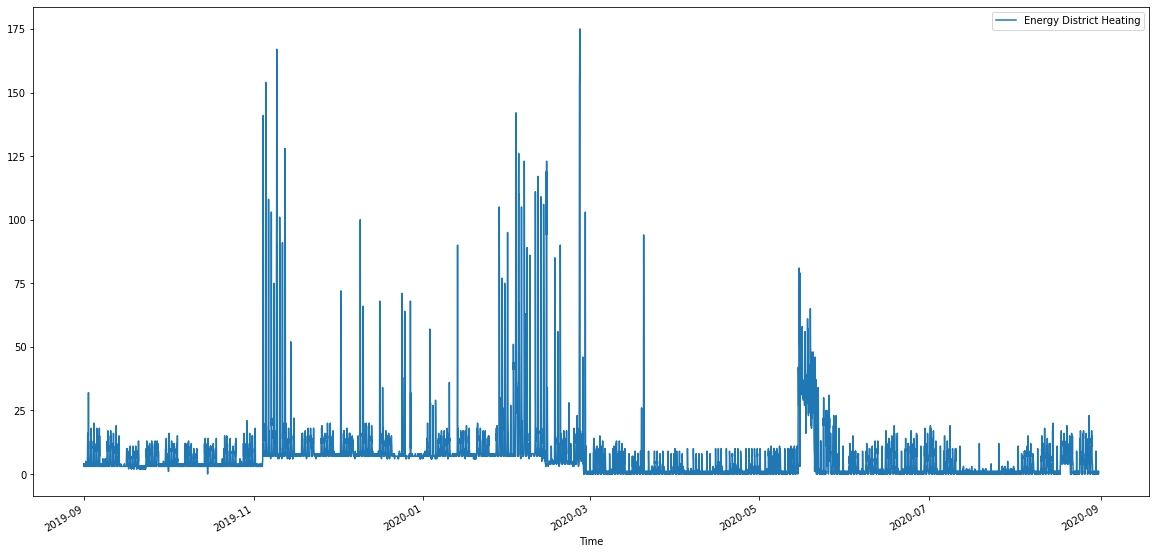

In [8]:
figure(figsize=(20,10))
data['kWh.1'].plot(label='Energy District Heating')
plt.legend()

[Text(0.5, 0, 'Time over a day'),
 Text(0.5, 1.0, 'Consumed energy (district heating) over a day (20219/10/01)')]

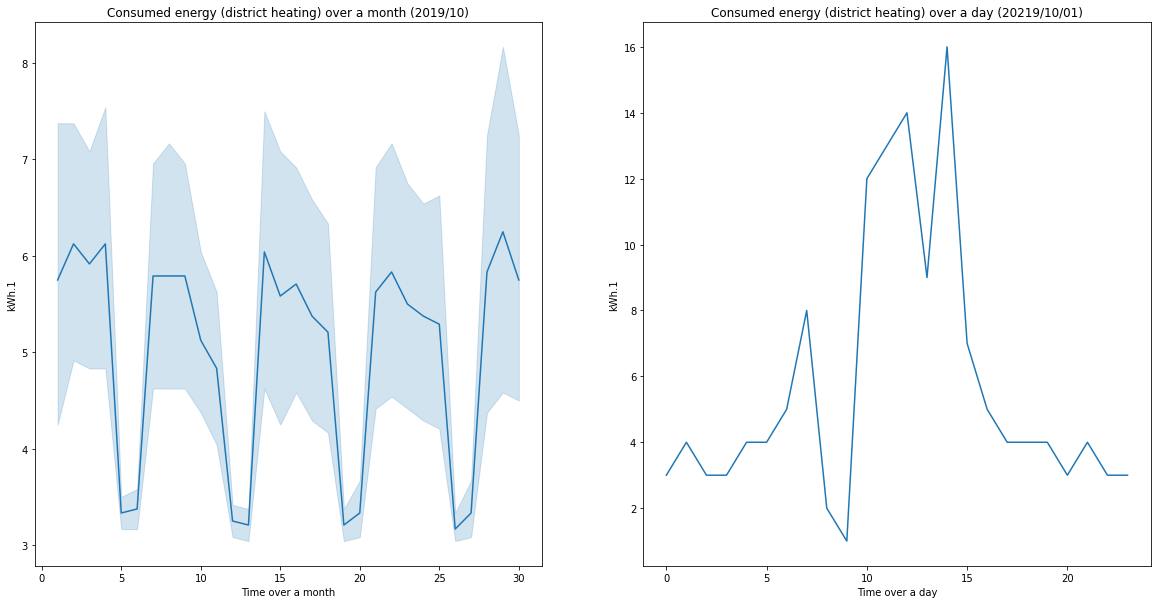

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

data_month = data.loc['2019-10-01':'2019-10-30']
data_day = data.loc['2019-10-01']

plot = sn.lineplot(x=data_month.index.day,y=data_month['kWh.1'], ax=axes[0])
plot.set(xlabel ="Time over a month", title = 'Consumed energy (district heating) over a month (2019/10)')
plot = sn.lineplot(x=data_day.index.hour,y=data_day['kWh.1'], ax=axes[1])
plot.set(xlabel ="Time over a day", title = 'Consumed energy (district heating) over a day (20219/10/01)')

[Text(0.5, 0, ' '),
 Text(0.5, 1.0, 'Consumed energy (district heating) over a day (2019/10/01)')]

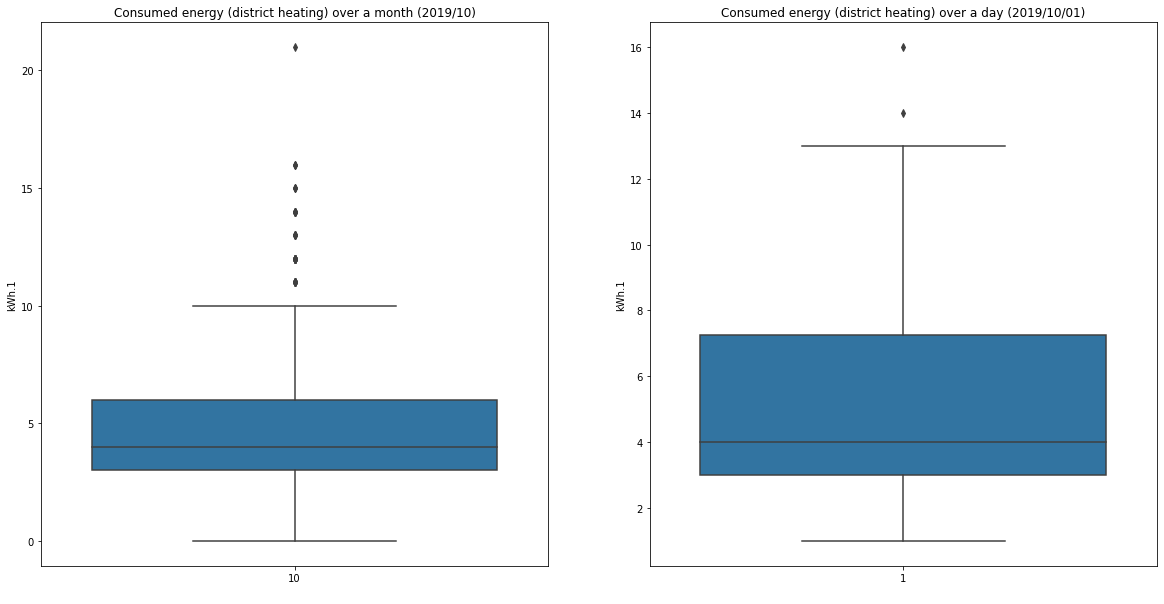

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

boxplot = sn.boxplot(x=data_month.index.month,y=data_month['kWh.1'], ax=axes[0])
boxplot.set(xlabel =" ", title = 'Consumed energy (district heating) over a month (2019/10)')

boxplot = sn.boxplot(x=data_day.index.day,y=data_day['kWh.1'], ax=axes[1])
boxplot.set(xlabel =" ", title = 'Consumed energy (district heating) over a day (2019/10/01)')

In [11]:
sort_data=np.sort(data['kWh.1'])[::-1]
exceedence = np.arange(1.,len(sort_data)+1) / len(sort_data)

figure(figsize=(20,10))
plt.plot(exceedence*100, sort_data)
plt.fill_between(exceedence*100, sort_data)
plt.xlabel("%")
plt.ylabel("kWh District Heating")
plt.title("Duration curve")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25b356c3-1729-4a63-aa76-9a34e88f1e0c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>